<a href="https://colab.research.google.com/github/leticiacaldas/Relatorio-1-CNC/blob/main/Relatorio1_Let%C3%ADciaBrand%C3%A3oCaldas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exeercicio 1:


Método:
Bissecção

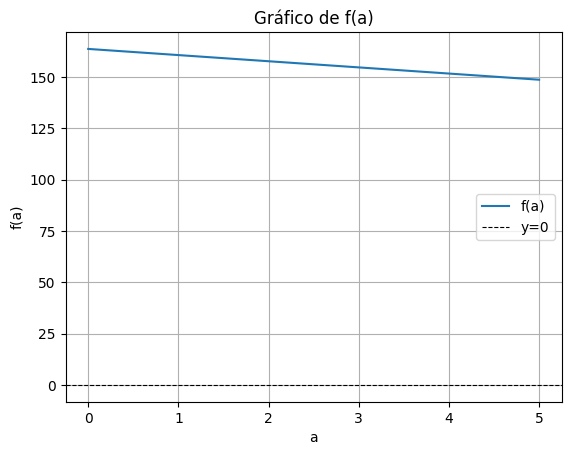

Valor de a: 1.9990234375


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def f(a):
    return np.exp(3) * 8 + 3 - 3 * a

# gráfico da função no intervalo [0, 5]
a_values = np.linspace(0, 5, 100)
f_values = f(a_values)

plt.plot(a_values, f_values, label='f(a)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8, label='y=0')
plt.xlabel('a')
plt.ylabel('f(a)')
plt.legend()
plt.title('Gráfico de f(a)')
plt.grid(True)
plt.show()

# Método da Bissecção
def bissecao(f, a, b, tol=1e-4, max_iter=10):
    iter_count = 0
    while (b - a) / 2 > tol and iter_count < max_iter:
        c = (a + b) / 2
        if f(c) == 0:
            break
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
        iter_count += 1

    return c

# intervalo inicial [1, 2]
a_raiz = bissecao(f, 1, 2, tol=0.0001)

print("Valor de a:", a_raiz)

Exercicio 2:

Método:
Newton-Raphson

In [ ]:
import numpy as np


def f(x):
    return x**3 - 100 * np.cos(x)

def df(x):
    return 3 * x**2 + 100 * np.sin(x)


def newton_raphson(x0, tol):
    x = x0
    iter_count = 0
    max_iter = 100

    while abs(f(x)) > tol and iter_count < max_iter:
        x = x - f(x) / df(x)
        iter_count += 1

    return x

# Condição inicial: x0 = 1
x0_a = 1
raiz_a = newton_raphson(x0_a, 0.001)

print(f'a) A raiz aproximada é: {raiz_a}')

# Condição inicial: x0 = -1
x0_b = -1
raiz_b = newton_raphson(x0_b, 0.001)

print(f'b) A raiz aproximada é: {raiz_b}')


a) A raiz aproximada é: 1.5346454577941748
b) A raiz aproximada é: -1.6127561270429593


A escolha do ponto inicial é crucial para o do Método de Newton-Raphson. Diferentes valores iniciais podem trazer resultados com convergência para raízes distintas, convergência para a mesma raiz, ou até mesmo em divergência, dependendo da proximidade do ponto inicial à raiz desejada e da presença de múltiplas raízes na função.

Exercicio 3:

Método:
Falsa Posição
​

In [ ]:
import numpy as np

# Função para o volume em relação à profundidade
def volume(h):
    R = 3
    return (np.pi * h**2 * (3*R - h)) / 3

# Função para o erro relativo aproximado
def erro_relativo_aproximado(valor_novo, valor_anterior):
    if valor_novo != 0 and valor_anterior is not None:
        return abs((valor_novo - valor_anterior) / valor_novo) * 100
    else:
        return float('inf')

# Método da Falsa Posição
def falsa_posicao(f, a, b, tol, max_iter):
    iteracao = 0
    valor_anterior = None

    while iteracao < max_iter:
        valor_novo = (a * f(b) - b * f(a)) / (f(b) - f(a))
        erro = erro_relativo_aproximado(valor_novo, valor_anterior)

        if erro < tol:
            break

        if f(valor_novo) * f(a) < 0:
            b = valor_novo
        else:
            a = valor_novo

        valor_anterior = valor_novo
        iteracao += 1

    return valor_novo, erro

a = 0
b = 6
tolerancia = 0.0001
max_iteracoes = 3


profundidade, erro = falsa_posicao(volume, a, b, tolerancia, max_iteracoes)


print(f'A profundidade para conter 30 m³ é aproximadamente: {profundidade:.4f} m')
print(f'Erro relativo aproximado após cada iteração: {erro:.6f}%')


A profundidade para conter 30 m³ é aproximadamente: 0.0000 m
Erro relativo aproximado após cada iteração: inf%


Exercicio 4:

In [ ]:
import numpy as np

# Parâmetros fornecidos
h = 300
F = 0.8
D = 14
C_objetivo = 1200
limite_iteracoes = 3
tolerancia = 1e-3

# Função C(A)
def C(A):
    return (np.pi * (h / np.cos(A))**2 * F) / (0.5 * np.pi * D**2 * (1 + np.sin(A) - 0.5 * np.cos(A)))

# Derivada de C(A)
def derivada_C(A):
    numerador = -np.pi * h**2 * F * np.sin(A)
    denominador = D**2 * np.cos(A)**3
    segundo_termo = np.pi * h**2 * F * np.cos(A) * (1 + np.sin(A) - 0.5 * np.cos(A))
    segundo_termo_denominador = D**2 * np.cos(A)**2 * (1 + np.sin(A) - 0.5 * np.cos(A))**2
    return (numerador / denominador) + (segundo_termo / segundo_termo_denominador)

# Método de Newton-Raphson
def newton_raphson(f, f_prime, x0, epsilon, max_iter):
    x = x0
    iteracao = 0

    while abs(f(x) - C_objetivo) > epsilon and iteracao < max_iter:
        x = x - (f(x) - C_objetivo) / f_prime(x)
        iteracao += 1

    return x


A_chute_inicial = np.pi / 25

A_resultado = newton_raphson(C, derivada_C, A_chute_inicial, tolerancia, limite_iteracoes)


print(f'O ângulo A para o qual C(A) de 1200 é aproximadamente: {np.degrees(A_resultado):.6f} graus')



O ângulo A para o qual C(A) de 1200 é aproximadamente: 10.505301 graus


Exercicio 5:

In [ ]:

import numpy as np

# Funções fornecidas
def func_a(x):
    return 2*x**4 + 4*x**3 + 3*x**2 - 10*x - 15

def func_b(x):
    return np.sin(x) * x + 4

def func_c(x):
    return (x - 3)**5 * np.log(x)

# Métodos de Bissecção, Falsa Posição, Newton-Raphson e Secante
def bisseccao(f, a, b, tol, max_iter):
    for i in range(max_iter):
        c = (a + b) / 2
        if f(c) == 0 or (b - a) / 2 < tol:
            return c
        elif np.sign(f(c)) == np.sign(f(a)):
            a = c
        else:
            b = c
    return None

def falsa_posicao(f, a, b, tol, max_iter):
    for i in range(max_iter):
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        if f(c) == 0 or abs(f(c)) < tol:
            return c
        elif np.sign(f(c)) == np.sign(f(a)):
            a = c
        else:
            b = c
    return None

def newton_raphson(f, f_prime, x0, tol, max_iter):
    x = x0
    for i in range(max_iter):
        x = x - f(x) / f_prime(x)
        if abs(f(x)) < tol:
            return x
    return None

def secante(f, x0, x1, tol, max_iter):
    for i in range(max_iter):
        x2 = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
        if abs(f(x2)) < tol:
            return x2
        x0, x1 = x1, x2
    return None

# Critérios de parada
tolerancia = 1e-10
max_iteracoes = 500

# Intervalos
intervalo_a = [0, 3]
intervalo_b = [1, 5]
intervalo_c = [2, 5]

# Métodos
resultado_a_bisseccao = bisseccao(func_a, *intervalo_a, tolerancia, max_iteracoes)
resultado_a_falsa_posicao = falsa_posicao(func_a, *intervalo_a, tolerancia, max_iteracoes)
resultado_a_newton = newton_raphson(func_a, lambda x: 8*x**3 + 12*x**2 + 6*x - 10, np.mean(intervalo_a), tolerancia, max_iteracoes)
resultado_a_secante = secante(func_a, *intervalo_a, tolerancia, max_iteracoes)

resultado_b_bisseccao = bisseccao(func_b, *intervalo_b, tolerancia, max_iteracoes)
resultado_b_falsa_posicao = falsa_posicao(func_b, *intervalo_b, tolerancia, max_iteracoes)
resultado_b_newton = newton_raphson(func_b, lambda x: np.cos(x) * x + np.sin(x) + 4, np.mean(intervalo_b), tolerancia, max_iteracoes)
resultado_b_secante = secante(func_b, *intervalo_b, tolerancia, max_iteracoes)

resultado_c_bisseccao = bisseccao(func_c, *intervalo_c, tolerancia, max_iteracoes)
resultado_c_falsa_posicao = falsa_posicao(func_c, *intervalo_c, tolerancia, max_iteracoes)
resultado_c_newton = newton_raphson(func_c, lambda x: (x - 3)**4 * (4 * np.log(x) + 1) / x, np.mean(intervalo_c), tolerancia, max_iteracoes)
resultado_c_secante = secante(func_c, *intervalo_c, tolerancia, max_iteracoes)

# resultados
print("Método da Bissecção:")
print("a) Resultado:", resultado_a_bisseccao)
print("b) Resultado:", resultado_b_bisseccao)
print("c) Resultado:", resultado_c_bisseccao)

print("\nMétodo da Falsa Posição:")
print("a) Resultado:", resultado_a_falsa_posicao)
print("b) Resultado:", resultado_b_falsa_posicao)
print("c) Resultado:", resultado_c_falsa_posicao)

print("\nMétodo de Newton-Raphson:")
print("a) Resultado:", resultado_a_newton)
print("b) Resultado:", resultado_b_newton)
print("c) Resultado:", resultado_c_newton)

print("\nMétodo da Secante:")
print("a) Resultado:", resultado_a_secante)
print("b) Resultado:", resultado_b_secante)
print("c) Resultado:", resultado_c_secante)


Método da Bissecção:
a) Resultado: 1.4928787086100783
b) Resultado: 4.323239543766249
c) Resultado: 3.000000000029104

Método da Falsa Posição:
a) Resultado: 1.492878708662261
b) Resultado: 4.323239543733132
c) Resultado: None

Método de Newton-Raphson:
a) Resultado: 1.4928787086636037
b) Resultado: -4.323239543682068
c) Resultado: 3.007012116079277

Método da Secante:
a) Resultado: -1.300384132642908
b) Resultado: 4.3232395437137425
c) Resultado: 2.991007884634376
